In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

### Read a geopandas file

In [4]:
counties = gpd.read_file("inputs/Counties.shp")
counties.head()

,OBJECTID,Male,Female,TotalPop,Code,Shape_Leng,Shape_Area,District,NAME,geometry
0,1,73694,69600,143294,402,10.178233,2.061417,Isiolo,ISIOLO,"POLYGON ((39.09307 1.89999, 39.09473 1.89988, ..."
1,2,345146,342166,687312,704,7.270236,1.779691,Kajiado,KAJIADO,"POLYGON ((36.53703 -1.15275, 36.53377 -1.16477..."
2,3,260630,267424,528054,202,1.958344,0.119874,Kirinyaga,KIRINYAGA,"POLYGON ((37.42583 -0.42661, 37.42603 -0.42693..."
3,4,315997,333934,649931,302,5.768976,0.673172,Kwale,KWALE,"MULTIPOLYGON (((39.28117 -4.66743, 39.27926 -4..."
4,5,198625,200602,399227,707,5.252248,0.769599,Laikipia,LAIKIPIA,"POLYGON ((36.83091 0.8159, 36.83192 0.80952, 3..."


### Clean the data (correctness of names and handle spaces)

In [ ]:
counties = counties.copy()
counties["NAME"] = counties.NAME.str.replace(" ", "_")
counties["NAME"] = counties.NAME.str.replace("/", "_")
counties.NAME.unique()

### Plot a map using "geometry" column

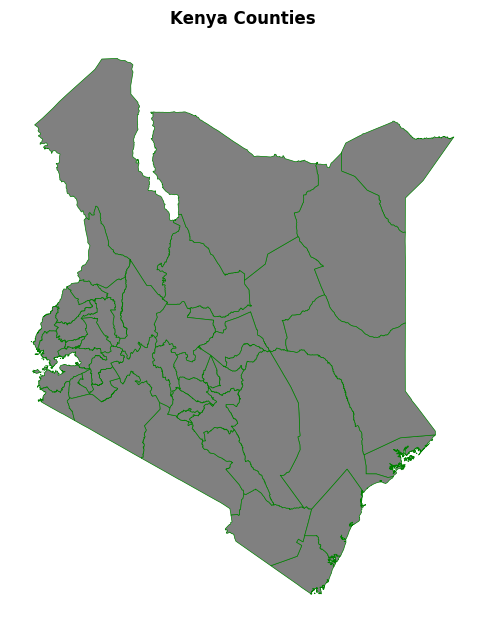

In [16]:
fig = counties.plot(color="grey", figsize=(6,8), edgecolor="green", linewidth=0.5)
fig.set_title("Kenya Counties", fontweight="bold")
fig.set_axis_off()

### Plot each county and store as a png file in a folder

In [ ]:
for _,row in counties.iterrows():
    fig,ax = plt.subplots(figsize=(9,9))
    gpd.GeoSeries([row.geometry]).plot(color="#F1EFF3", ax=ax, edgecolor="black")
    
    # add label at centroid
    x,y = row.geometry.centroid.coords[0]
    ax.set_title(row["NAME"], fontweight="bold")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig(f"outputs/{row['NAME'].lower()}.png", dpi=300)
    plt.close(fig)

In [ ]:
### Plot population density map

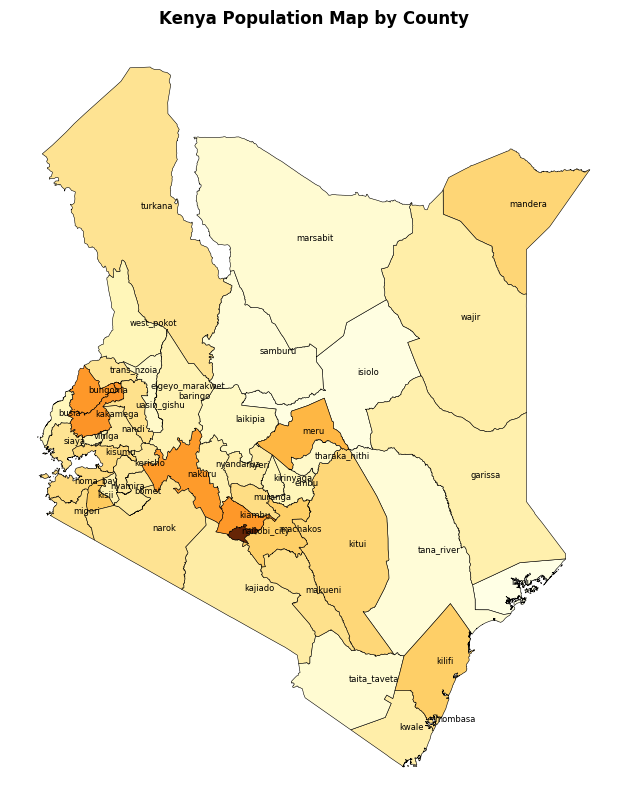

In [101]:
fig, ax = plt.subplots(figsize=(10,10))

counties.plot(column="TotalPop", cmap="YlOrBr", linewidth=0.4, edgecolor="black", ax=ax)

for _,row in counties.iterrows():
    x,y = row.geometry.centroid.coords[0]
    ax.text(x,y,row["NAME"].lower(), fontsize=6)

ax.set_title("Kenya Population Map by County", fontweight="bold")
# ax.spines[["top","right","bottom","left"]].set_visible(False)
ax.set_axis_off()
plt.savefig("outputs/kenya_pop.png",dpi=300)
plt.show()

plt.close(fig)